# Mini-Batches in Deep Learning

Welcome back! In our journey through deep learning, we've discovered the importance of structuring our data into mini-batches for efficient training. Instead of overwhelming our computer with the entire dataset of 60,000 images at once, we break it down into manageable mini-batches. A commonly used batch size is 32, but this can vary based on the specific requirements of your project and the limitations of your hardware.

## The Importance of Mini-Batching

Mini-batching serves two primary purposes:

1. **Computational Efficiency**: It's more feasible for a machine's memory (whether CPU or GPU) to handle smaller subsets of data at a time. Even though our dataset might not be enormous by deep learning standards, adopting the mini-batching practice early on prepares us for larger, more demanding datasets.

2. **Frequent Gradient Updates**: Mini-batches allow for more frequent updates to the model's gradients, potentially leading to faster and more stable convergence during training. Instead of making a single update per epoch, the model updates its parameters multiple times per epoch, once for each mini-batch.

## Implementing Data Loaders in PyTorch

To create mini-batches, we leverage PyTorch's `DataLoader`. This tool transforms our dataset into an iterable over which we can loop during training. The process involves specifying the dataset, batch size, and whether to shuffle the data. Shuffling helps ensure that each mini-batch is a random sample of the data, which can prevent the model from learning unintended patterns from the order of the examples.

Here's how we set up our Data Loaders:





100%|██████████| 26421880/26421880 [00:02<00:00, 10814469.68it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 464087.52it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6111959.68it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6443532.38it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



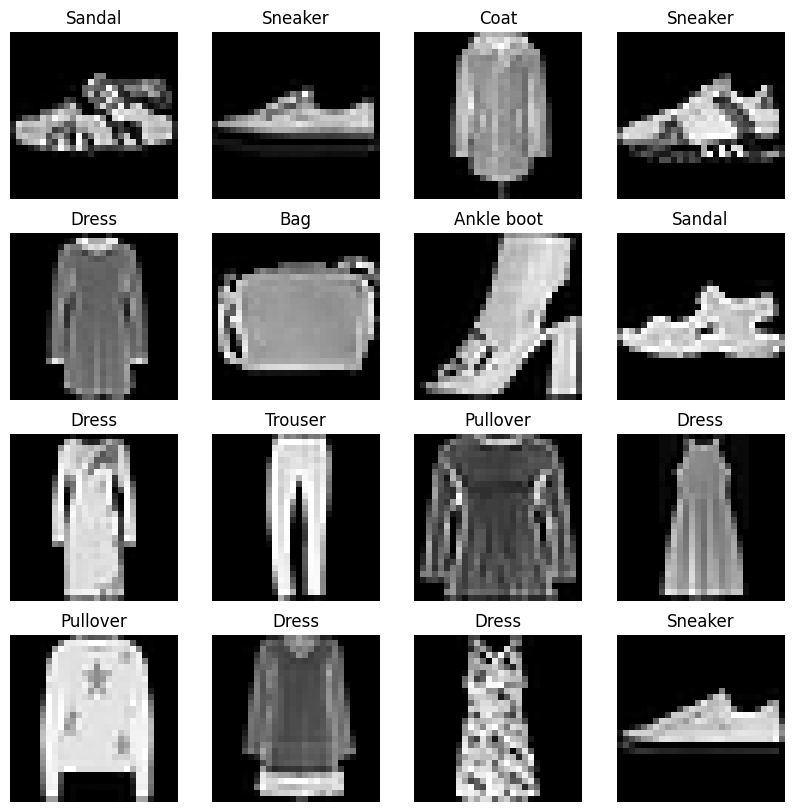

In [6]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set the seed for reproducibility
torch.manual_seed(42)

# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor()])

# Load the Fashion MNIST training and test datasets
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Define the batch size
batch_size = 32

# Create DataLoader for both training and test sets
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Function to visualize a batch of images
def visualize_batch(data_loader, class_names):
    images, labels = next(iter(data_loader))  # Get one batch of images and labels
    plt.figure(figsize=(10,10))  # Set the figure size
    for i in range(16):  # Display the first 16 images in the batch
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Remove the color channel
        plt.title(class_names[labels[i].item()])
        plt.axis('off')
    plt.show()

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize a batch of images
visualize_batch(train_data_loader, class_names)


This code snippet performs the following tasks:

Imports the Required Libraries: Loads PyTorch, torchvision for dataset handling, DataLoader for batching, and matplotlib for visualization.

Sets a Seed: Ensures reproducibility of the results by setting a manual seed with torch.manual_seed(42).

Defines Transformations: Prepares the dataset by transforming the images into tensors using transforms.ToTensor().

Loads the Dataset: Downloads and loads the Fashion MNIST dataset for both training and testing.

Creates DataLoaders: Sets up DataLoaders for both datasets with a specified batch_size of 32, shuffling only the training data.

Visualizes a Batch: Defines a function visualize_batch to display a grid of images from a single batch, using the class names to label each image.

By following these steps, we not only prepare our dataset for training with mini-batches but also gain a deeper understanding of our data through visualization. This approach is foundational for developing efficient and effective deep learning models.